# Capstone project notebook

## Problem 3

### What Is the Relationship between Housing Characteristics and Complaints?
The goal of this exercise is to find the answer to the Question 3 of the problem statement: 

### Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

In this exercise, use the 311 dataset.

You also need to read back the PLUTO dataset from Cloud Object Store that you saved previously in the course. Use the PLUTO dataset for the borough that you already identified to focus on the last exercise.Ensure that you use only a limited number of fields from the dataset so that you are not consuming too much memory during your analysis.

The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_cba83a820ee941cd921cc2bbfefd15eb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='56RsTx8E6jPTOm05rXcEWp-YR-lpps36XB-mae6-wNk9',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cba83a820ee941cd921cc2bbfefd15eb.get_object(Bucket='edx1-donotdelete-pr-ffppmpbmudcobi',Key='nyc311.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_311 = pd.read_csv(body)
df_311.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BRONX,BRONX,2018-04-24T14:15:01.000,GENERAL,2017-12-12T10:05:40.000,383 EAST 162 STREET,10451.0,40.824952,RESIDENTIAL BUILDING,-73.913944,The Department of Housing Preservation and Dev...,Closed,EAST 162 STREET,37914383
1,ADDRESS,BRONX,BRONX,2018-04-24T14:15:02.000,GENERAL,2018-01-08T12:47:29.000,383 EAST 162 STREET,10451.0,40.824952,RESIDENTIAL BUILDING,-73.913944,The Department of Housing Preservation and Dev...,Closed,EAST 162 STREET,38152033
2,ADDRESS,QUEENS,Woodside,2018-04-24T21:29:42.000,PAINT/PLASTER,2018-01-08T22:33:51.000,60-10 47 AVENUE,11377.0,40.739912,RESIDENTIAL BUILDING,-73.904328,The Department of Housing Preservation and Dev...,Closed,47 AVENUE,38157143
3,ADDRESS,QUEENS,Astoria,2018-04-24T09:50:17.000,APPLIANCE,2018-01-12T17:09:03.000,34-15 31 STREET,11106.0,40.759282,RESIDENTIAL BUILDING,-73.927550,The Department of Housing Preservation and Dev...,Closed,31 STREET,38205215
4,ADDRESS,QUEENS,Astoria,2018-04-24T09:50:18.000,DOOR/WINDOW,2018-01-22T14:04:15.000,30-34 32 STREET,11102.0,40.765523,RESIDENTIAL BUILDING,-73.921410,The Department of Housing Preservation and Dev...,Closed,32 STREET,38275095


### Read Bronx file

To prevent loading unnecesary data, we select the columns to load

In [3]:
body = client_cba83a820ee941cd921cc2bbfefd15eb.get_object(Bucket='edx1-donotdelete-pr-ffppmpbmudcobi',Key='bronxs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
cols_to_read = [  'Address',
                  'BldgArea',
                  'BldgDepth',
                  'BuiltFAR',
                  'CommFAR',
                  'FacilFAR',
                  'Lot', 
                  'LotArea',
                  'LotDepth',
                  'NumBldgs',
                  'NumFloors',
                  'OfficeArea',
                  'ResArea',
                  'ResidFAR',
                  'RetailArea',
                  'YearBuilt',
                  'YearAlter1',
                  'ZipCode',
                  'YCoord',
                  'XCoord']
df_bronx_info = pd.read_csv(body, usecols=cols_to_read)

In [4]:
df_bronx_info.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


### We create a subset pandas dataframe

With only the values to study, namely borough, address and location. After that we make and encoding setting BRONX as 1 and all others as 0


In [4]:
df_bronx_incidents = df_311[['complaint_type', 'incident_address', 'latitude', 'longitude']].loc[df_311['borough'] == 'BRONX']
df_bronx_incidents.head()

,complaint_type,incident_address,latitude,longitude
0,GENERAL,383 EAST 162 STREET,40.824952,-73.913944
1,GENERAL,383 EAST 162 STREET,40.824952,-73.913944
6,PAINT/PLASTER,2647 SEDGWICK AVENUE,40.869502,-73.904438
9,WATER LEAK,2647 SEDGWICK AVENUE,40.869502,-73.904438
10,WATER LEAK,2647 SEDGWICK AVENUE,40.869502,-73.904438


In [5]:
df_bronx_incidents['complaint_type'] = (df_bronx_incidents['complaint_type'] == 'HEAT/HOT WATER').astype(int)

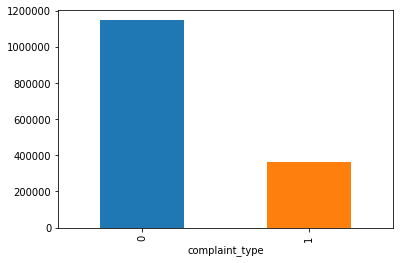

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df_bronx_incidents.groupby('complaint_type').agg('complaint_type').count().plot.bar()

### We need to join incidents with building information

A left inner join is what we need

In [7]:
df_bronx = pd.merge(df_bronx_incidents, df_bronx_info, how='left', left_on=['incident_address'], right_on=['Address'])

In [8]:
df_bronx.shape

(1510149, 24)

### There are incident streets not available in the pluto file, so we just drop them

In [9]:
df_bronx.dropna(inplace=True)

### Let's get rid of the addresses

Let's see how many null values we have in the dataframe, and then eliminate them. Also we can select Lot as the index

In [10]:
df_bronx.drop(['Address', 'incident_address'], axis=1, inplace=True)
df_bronx.set_index('Lot', inplace=True)

### Eliminate duplicates

There are a lot of duplicates. We are cleaning them and it results in 33880 rows

In [11]:
df_bronx.drop_duplicates(inplace=True)

In [12]:
df_bronx.shape

(33880, 21)

### Let's define dependant and independant variables

In [13]:
import numpy as np

y = np.asarray(df_bronx['complaint_type'])
predictors = df_bronx.columns.difference(['complaint_type'])
X = df_bronx[predictors]

In [14]:
X.head(10)

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,XCoord,YCoord,YearAlter1,YearBuilt,ZipCode,latitude,longitude
Lot,,,,,,,,,,,,,,,,,,,,
100.0,27225.0,90.0,4.54,0.0,4.8,6003.0,121.83,1.0,5.0,0.0,25225.0,2.43,2000.0,1010691.0,256196.0,0.0,1924.0,10468.0,40.869502,-73.904438
21.0,54500.0,81.0,4.04,0.0,4.8,13500.0,90.00,1.0,5.0,0.0,50350.0,3.44,4150.0,1010610.0,235664.0,2011.0,1926.0,10455.0,40.813584,-73.905006
40.0,63836.0,113.0,5.31,0.0,6.5,12021.0,123.17,1.0,6.0,1250.0,62586.0,6.02,0.0,1015466.0,257916.0,0.0,1927.0,10468.0,40.874261,-73.886703
63.0,8020.0,82.0,3.41,0.0,4.8,2353.0,94.62,1.0,4.0,0.0,5970.0,2.43,2050.0,1011014.0,236762.0,0.0,1910.0,10455.0,40.816478,-73.902954
130.0,10308.0,0.0,2.79,0.0,4.8,3701.0,95.65,1.0,4.0,0.0,10308.0,2.43,0.0,1011029.0,237284.0,0.0,2003.0,10455.0,40.818093,-73.903530
1.0,61800.0,150.0,4.16,0.0,4.8,14850.0,150.00,2.0,5.0,0.0,61800.0,2.43,0.0,1020820.0,258276.0,0.0,1926.0,10467.0,40.875292,-73.867797
50.0,46212.0,90.0,4.62,0.0,4.8,10000.0,100.00,1.0,6.0,0.0,46212.0,3.44,0.0,1021040.0,250237.0,0.0,1939.0,10462.0,40.853364,-73.866738
62.0,38388.0,124.0,4.36,0.0,6.5,8800.0,160.00,1.0,7.0,600.0,36588.0,6.02,1200.0,1013436.0,255116.0,0.0,1952.0,10468.0,40.866679,-73.893925
49.0,19235.0,93.5,3.49,0.0,4.8,5515.0,110.03,1.0,5.0,0.0,19235.0,3.44,0.0,1005219.0,246002.0,1991.0,1912.0,10452.0,40.841998,-73.924468


In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [16]:
X.head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
from scipy.stats import pearsonr

### Let's calculate correlations

Pearson correlation. As we want to know the importance as predictor, the absolute value is the indicator of correlation (ignoring if it is possitive or negative

In [ ]:
correlations = []
for variable in df_bronx[df_bronx.columns.difference(['complaint_type'])]:
    corr, p_value = pearsonr(y, X[variable])
    correlations.append([variable,corr,p_value])
df_correlations = pd.DataFrame.from_records(correlations, columns=['predictor','Pearson correlation','p value'])


In [ ]:
df_correlations.sort_values('Pearson correlation').head()

In [ ]:
df_correlations.sort_values('Pearson correlation', ascending=False).head()

### Resulting in:

1. NumFloors (+)
2. BldgDepth (+)
3. ResidFAR (+)
3. FacilFAR (+)
3. XCoord (-)

In [ ]:
df_bronx.plot.scatter(x='NumFloors', y='BldgDepth', c='complaint_type')

In [ ]:
df_bronx['NumFloors'].plot.bar()